<a href="https://colab.research.google.com/github/Vinct21/Python/blob/main/Final_Project_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Data_Negara_HELP.csv')
df.isnull()


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


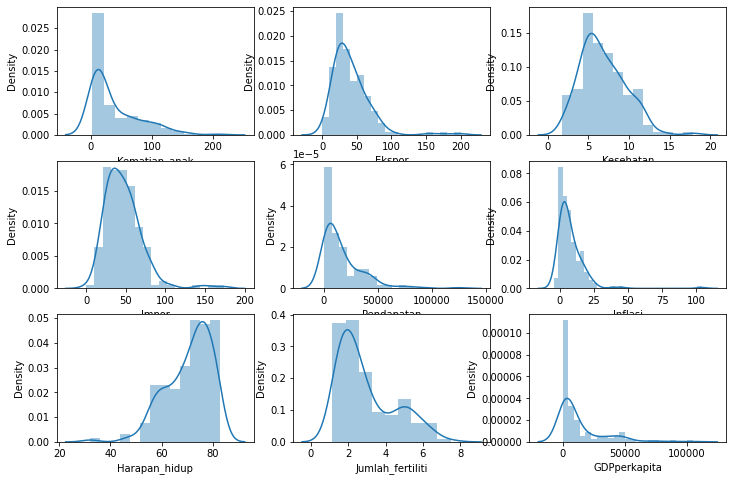

In [ ]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

In [ ]:
Pendapatan = df.sort_values('Pendapatan', ascending=True)
Pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
...,...,...,...,...,...,...,...,...,...,...
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
82,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000


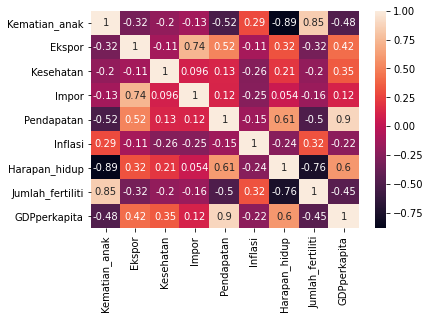

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['GDPperkapita']))

23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64


In [ ]:
df2 = remove_outlier(df[['Pendapatan', 'GDPperkapita']])

df2.dropna(axis=0, inplace=True)
df2

,Pendapatan,GDPperkapita
0,1610,553
1,9930,4090
2,12900,4460
3,5900,3530
4,19100,12200
...,...,...
162,2950,2970
163,16500,13500
164,4490,1310
165,4480,1310


In [ ]:
df2['Pendapatan'].unique()

array([  1610,   9930,  12900,   5900,  19100,  18700,   6700,  41400,
        43200,  16000,  22900,  41100,   2440,  15300,  16200,   7880,
         1820,   6420,   5410,   9720,  13300,  14500,  80600,   1430,
          764,   2520,   2660,  40700,   5830,    888,   1930,  19400,
         9530,  10900,   1410,    609,   5190,  13000,   2690,  20100,
        33900,  28300,  44000,  11100,   9350,   9860,   7300,  33700,
         1420,  22700,   7350,  39800,  36900,  15400,   1660,   6730,
        40400,   3060,  28700,  11200,   6710,   1190,   1390,   5840,
         1500,  22300,  38800,   4410,   8430,  17400,  12700,  45700,
        29600,  36200,   8000,  35800,   9470,   2480,   1730,  75200,
         2790,   3980,  18300,  16300,   2380,    700,  21100,  91700,
        11400,   1030,  10500,   1870,   3320,  15900,   3340,   3910,
         7710,  14000,   6440,    918,   3720,   8460,   1990,  45500,
        32300,    814,   5150,  62300,  45300,   4280,   7290,   9960,
      

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2.astype(float))

In [ ]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['Pendapatan', 'GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Pendapatan,GDPperkapita,label1_kmeans
0,-0.808245,-0.679180,0
1,-0.375369,-0.485623,0
2,-0.220844,-0.465376,0
3,-0.585043,-0.516268,0
4,0.101732,-0.041817,0
...,...,...,...
162,-0.738527,-0.546913,0
163,-0.033542,0.029323,0
164,-0.658404,-0.637754,0
165,-0.658924,-0.637754,0


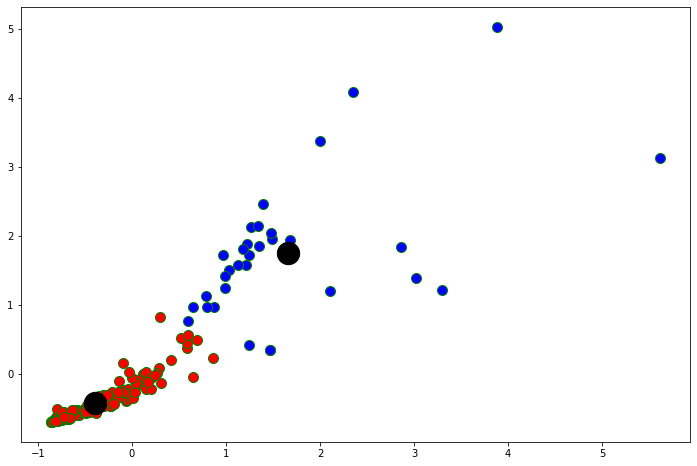

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0],new_df['GDPperkapita'][new_df.label1_kmeans==0], c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1],new_df['GDPperkapita'][new_df.label1_kmeans==1], c='blue', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=500)
plt.show()

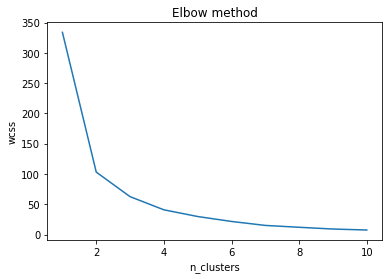

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
new_df

,Pendapatan,GDPperkapita,label1_kmeans
0,-0.808245,-0.679180,0
1,-0.375369,-0.485623,0
2,-0.220844,-0.465376,0
3,-0.585043,-0.516268,0
4,0.101732,-0.041817,0
...,...,...,...
162,-0.738527,-0.546913,0
163,-0.033542,0.029323,0
164,-0.658404,-0.637754,0
165,-0.658924,-0.637754,0


In [ ]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)

In [ ]:
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

In [ ]:
df['label2_kmeans'] = labels2
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


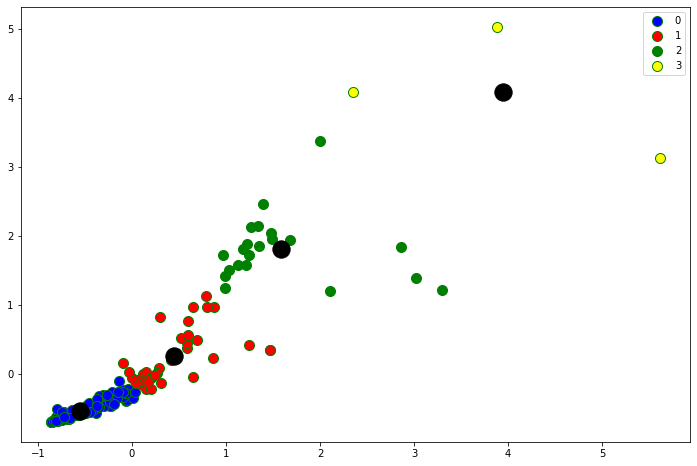

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==0], new_df['GDPperkapita'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==1], new_df['GDPperkapita'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==2], new_df['GDPperkapita'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==3], new_df['GDPperkapita'][new_df.label2_kmeans==3], label='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.7272625121110462
0.6139089213550839


In [ ]:
#summary
df['K_means_labels'] = kmeans2.labels_
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [ ]:
# Filtering
Low_Pendapatan = df[df['K_means_labels']==0]
Low_Pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [ ]:
Low_Pendapatan.sort_values(by=['Pendapatan'],ascending=True)[:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label2_kmeans,K_means_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0
